In [14]:
out_dir = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/atrophy_seeds_2023/Figures/diagnostic_ability'

In [7]:
csv_path = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/atrophy_seeds_2023/Figures/diagnostic_ability/auc_comparison.csv'

Create Your Own Data PRN

In [ ]:
data = {
    'Frontal Lobe': {'CSF': 0.49, 'Surface': -0.03, 'GM': -0.14, 'WM': -0.07},
    'Parietal Lobe': {'CSF': 0.39, 'Surface': -0.06, 'GM': -0.19, 'WM': -0.16},
    'Occipital Lobe': {'CSF': 0.28, 'Surface': 0.03, 'GM': 0.21, 'WM': 0.27 },
    'Temporal Lobe': {'CSF': 0.56, 'Surface': 0.57, 'GM': 0.25, 'WM': 0.07},
    'Mesial Temporal Lobe': {'CSF': 0.66, 'Surface': 0.42, 'GM': 0.25, 'WM': 0.27},
    'Cerebellum': {'CSF': 0.40, 'Surface': 0.01, 'GM': -.23, 'WM': -.16 },
    'Ventriculomegaly': {'CSF': 0.78, 'Surface': 0.01, 'GM': -0.09, 'WM': 0.04 },
}

In [11]:
import pandas as pd
df = pd.read_csv(csv_path)
df

,Segment,Leave All In,Leave One Out,Validation
0,CSF,0.80,0.91,0.90
1,GM,0.74,0.66,0.51
2,WM,0.71,0.70,0.52
3,CT,0.66,0.80,0.83
4,Clinician,0.76,0.48,0.56


In [12]:
# Melt the DataFrame to reshape it for plotting
melted = pd.melt(df, id_vars=['Segment'])
melted

,Segment,variable,value
0,CSF,Leave All In,0.80
1,GM,Leave All In,0.74
2,WM,Leave All In,0.71
3,CT,Leave All In,0.66
4,Clinician,Leave All In,0.76
5,CSF,Leave One Out,0.91
6,GM,Leave One Out,0.66
7,WM,Leave One Out,0.70
8,CT,Leave One Out,0.80
9,Clinician,Leave One Out,0.48


/var/folders/82/946tskyj68b6htgvndtppmz80000gp/T/ipykernel_48198/2007920963.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='variable', y='value', hue='Segment', style='Segment',
/var/folders/82/946tskyj68b6htgvndtppmz80000gp/T/ipykernel_48198/2007920963.py:18: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.lineplot(data=df, x='variable', y='value', hue='Segment', style='Segment',
/var/folders/82/946tskyj68b6htgvndtppmz80000gp/T/ipykernel_48198/2007920963.py:18: UserWarning: 
The markers list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=df, x='variable', y='value', hue='Segment', style='Segment',


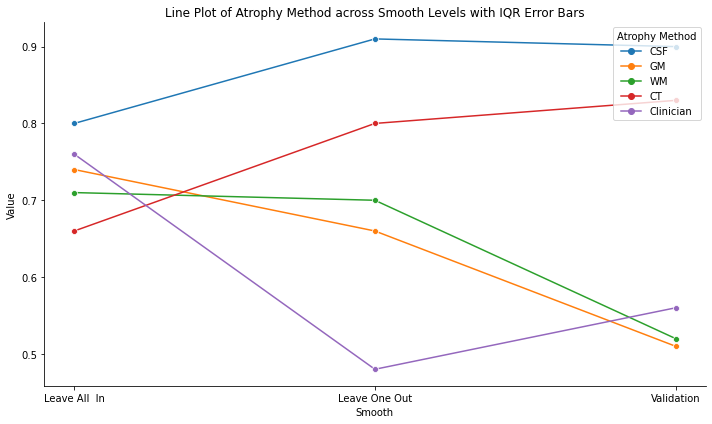

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Assuming your dataframe is named 'df'
df=melted

# Calculate the median and quartiles for each group
grouped = df.groupby(['Segment'])['variable']

# Define color palette
palette = sns.color_palette('tab10')
X_ORDER = ['Leave All In', 'Leave One Out', 'Validation']


# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='variable', y='value', hue='Segment', style='Segment', 
             markers='o', dashes=False, palette=palette, hue_order=None, style_order=None, 
             units=None, estimator='mean', ci=None, sort=True, err_style=None, err_kws=None, legend='full', ax=None)

plt.legend(title='Atrophy Method', loc='upper right')
plt.title('Line Plot of Atrophy Method across Smooth Levels with IQR Error Bars')
plt.xlabel('Smooth')
plt.ylabel('Value')
plt.tight_layout()
sns.despine()
plt.grid(False)
plt.savefig(os.path.join(out_dir, 'error_plot.svg'))
plt.show()


Exptl